In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3,suppress = True)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#pobieranie danych
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
raw_dataset = pd.read_csv(url,names = column_names, na_values='?', comment='\t',
                          sep=' ',skipinitialspace=True)

In [4]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
dataset.isna().sum()

MPG 0
Cylinders 0
Displacement 0
Horsepower 6
Weight 0
Acceleration 0
Model Year 0
Origin 0
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.isna().sum()

MPG 0
Cylinders 0
Displacement 0
Horsepower 0
Weight 0
Acceleration 0
Model Year 0
Origin 0
dtype: int64

In [8]:
dataset['Origin'] = dataset['Origin'].map({1:'USA',2:'Europe',3:'Japan'})

In [9]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [10]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [11]:
#podział danych na treningowe i testowe
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

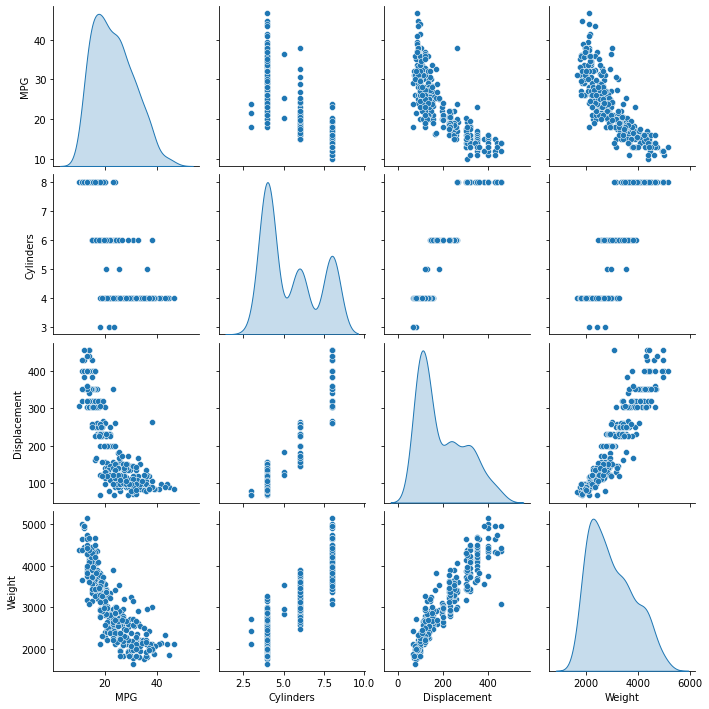

In [12]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Weight']],diag_kind = 'kde')

In [13]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [17]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [14]:
train_dataset.describe().transpose()[['mean','std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [15]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [18]:
normalizer.adapt(np.array(train_features))

In [19]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [20]:
first = np.array(train_features[:1])

with np.printoptions(precision=2,suppress=True):
    print(f'Pierwszy przypadek: {first}')
    print()
    print(f'przypadek znormalizowany: {normalizer(first).numpy()}')

Pierwszy przypadek: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

przypadek znormalizowany: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [21]:
#Regresja liniowa z jedną zmienną

horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,],axis=None)
horsepower_normalizer.adapt(horsepower)

In [22]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [23]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 108ms/step


array([[-1.119],
 [-0.632],
 [ 2.065],
 [-1.568],
 [-1.418],
 [-0.557],
 [-1.681],
 [-1.418],
 [-0.37 ],
 [-0.632]], dtype=float32)

In [28]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [29]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 4.85 s, sys: 193 ms, total: 5.04 s
Wall time: 5.14 s


In [30]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.802539,4.186120,95
96,3.807025,4.174021,96
97,3.805062,4.205456,97
98,3.803640,4.190027,98
99,3.804234,4.197299,99


In [31]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error[MPG]')
    plt.legend()
    plt.grid(True)
    

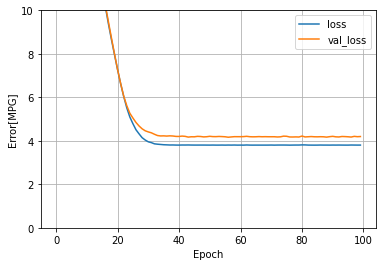

In [32]:
plot_loss(history)

In [33]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0
)

In [34]:
x = tf.linspace(0.0,250,251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 1ms/step


In [35]:
def plot_horsepower(x,y):
    plt.scatter(train_features['Horsepower'],train_labels,label='Data')
    plt.plot(x,y,color='k',label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

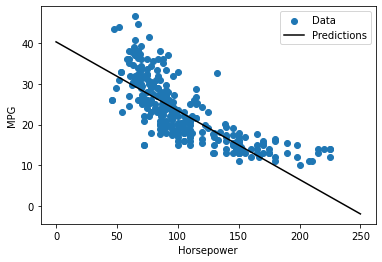

In [36]:
plot_horsepower(x,y)

In [37]:
#regresja liniowa z wieloma danymi wejściowymi

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [38]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 67ms/step


array([[-0.599],
 [-1.226],
 [ 1.061],
 [-1.923],
 [ 0.901],
 [-0.503],
 [ 0.986],
 [-2.49 ],
 [ 0.112],
 [ 2.295]], dtype=float32)

In [39]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [40]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 4.9 s, sys: 178 ms, total: 5.08 s
Wall time: 5.61 s


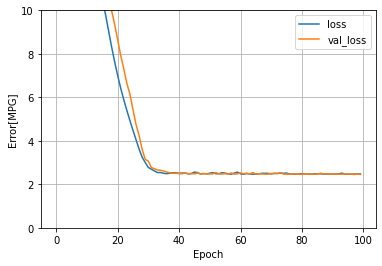

In [41]:
plot_loss(history)

In [42]:
test_results['linear_model'] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0
)

In [43]:
#Regresja z głęboką siecią neuronową (DNN)
def build_and_compile(norm):
    model = keras.Sequential([
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(1)
    ])
    mode.compile(loss='mean_absolute_error',
                 optimizer=tf.keras.optimizers.Adam(0.001))
    return model